Matriz A = 
coeficientes a =  [ 1.00000000e+00 -3.58798021e-12 -2.14935253e+01  1.05425702e-11
  2.77585302e+02  5.02180269e-10 -1.87140780e+03 -3.26090553e-09
  6.58241591e+03  7.54384914e-09 -1.20727039e+04 -7.50005643e-09
  1.08495594e+04  2.70797796e-09 -3.74491696e+03]


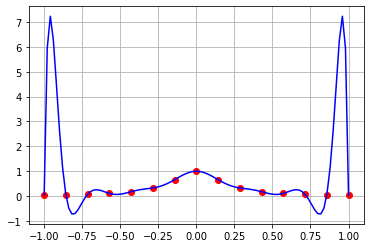

       14             13             12           11             10
-3745 x  + 2.708e-09 x  + 1.085e+04 x  - 7.5e-09 x  - 1.207e+04 x 
              9        8             7        6             5         4
 + 7.544e-09 x + 6582 x - 3.261e-09 x - 1871 x + 5.022e-10 x + 277.6 x
              3         2
 + 1.054e-11 x - 21.49 x - 3.588e-12 x + 1


In [1]:
#interpolação polinomial

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 15)
y = (1) / (1+25*x**2)#fx

dim = len(x)



A = np.zeros((dim,dim), dtype=np.float64)
A[0:dim, 0] = 1



for j in range(1, dim):
  for i in range(0, dim):
    A[i, j] = x[i]**j

print("Matriz A = ")




alpha = np.linalg.solve(A, y)
print("coeficientes a = ",alpha)


plt.plot(x, y ,"ro")
data = np.linspace(min(x),max(x), 100)
a = alpha[::-1].copy()
p = np.poly1d(a)
plt.plot(data , p(data), color = "blue")
plt.grid()
plt.show()

print(p)

(x) [-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
 -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
  0.71428571  0.85714286  1.        ]
(y) [0.03846154 0.0516333  0.0727003  0.1091314  0.17883212 0.32885906
 0.66216216 1.         0.66216216 0.32885906 0.17883212 0.1091314
 0.0727003  0.0516333  0.03846154]
Matriz(A)
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.14285714 0.57142857 0.14285714 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.14285714 0.57142857 0.14285714 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.14285714 0.57142857 0.14285714 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.  

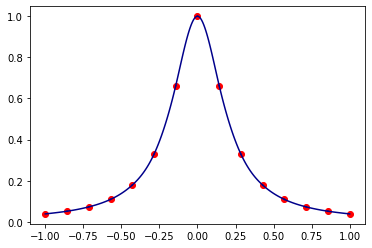

In [2]:
#interpolação Spline
import sympy 
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 15)

y = (1) / (1+25*x**2) #fx

dim = len(x)


h = np.zeros(0)
for j in range(1, dim):
  h = np.append(h, (x[j]) - (x[j-1]) )




print("(x)", x)
print("(y)", y)




A = np.zeros((dim,dim), dtype=np.float64)
A[0,0] = 1
A[dim-1, dim-1] = 1
for i in range(1, dim-1): 
  A[i, i-1] =  h[i-1] #i-1
  A[i, i+1] =  h[i] #i
  A[0,1] = 0

for i in range(1, dim-1): 
  A[i, i] =  2*(h[i-1] + h[i])


print("Matriz(A)")
print(A)


#AX = B
vec = np.zeros(1)
for i in range(2, dim):
  vec = np.append(vec, ( ( 3 / h[i-1] )*(y[i] - y[i-1]) ) - ( ( 3 / h[i-2] )*(y[i-1] - y[i-2]) ) )

vec = np.append(vec, 0)


c = np.linalg.solve(A, vec) #Resolve Sistema Linear
print("(c)",c)


#define bj e dj com os valores do vetor c
b = np.zeros(0)
d = np.zeros(0)



k=0
for j in range(0, dim-1):
  k=k+1
  b = np.append(b, ( 1 / h[j])*(y[k] - y[j]) - (h[j] / 3)*(2*c[j] + c[k]))
  d = np.append(d, (c[k] - c[j]) / (3*h[j]) )



print("(b)", b)
print("(d)", d)


fig,ax = plt.subplots()
ax.scatter(x, y, color = 'red')
for i in range(0, dim-1):
  xs = np.linspace(x[i], x[i+1], 100)
  splx =  y[i] + b[i]*(xs - x[i]) + c[i]*((xs - x[i])**2) + d[i]*((xs - x[i])**3)
  ax.plot(xs, splx, color =  "darkblue")